Se realiza un análisis de un texto de una página web, en este caso, se utiliza como ejemplo el mensaje Urbi et Orbi pronunciado por el Papa Francisco en la pasada Pascua desde la Basílica de San Pedro.

Se adjunta la página oficial del Vaticano con este mensaje: https://www.vatican.va/content/francesco/es/messages/urbi/documents/20250420-urbi-et-orbi-pasqua.html

1. DESCARGA E IMPORTACIÓN DE BIBLIOTECAS NECESARIAS

In [3]:
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
from collections import Counter
import re
import matplotlib.pyplot as plt

2. EXTRACCIÓN TEXTO DESEADO DE LA URL DESEADA

In [4]:
# URL de la página sobre la que se quiere extraer texto
url = "https://www.vatican.va/content/francesco/es/messages/urbi/documents/20250420-urbi-et-orbi-pasqua.html"

# Se realiza la solicitud GET para obtener el HTML de la página
respuesta = requests.get(url)

# Comprobación de que la solicitud HTTP ha sido exitosa (éxito = 200) 
if respuesta.status_code == 200:
    # Creación de un objeto con el HTML de la página del Vaticano
    soup = BeautifulSoup(respuesta.text, 'html.parser')

    # Se buscan todos los párrafos de la página web del Vaticano con el mensaje del Papa en la pasada Pascua.
    parrafos = soup.find_all('p')
    
    # NOTA --> En caso de que el texto tenga alguna tipología, ejemplo, centrado, justificado, etc, habría que incluirlo en el código cuando se realiza la búsqueda. Ejemplo --> parrafos = soup.find_all('p', class_='Justificado')

    # En un primer momento seleccionamos todos los párrafos, posteriormente se excluirán algunos que no forman parte del mensaje, pero se desarrollan en la página web. 
    parrafos_seleccionados = [parrafo for parrafo in parrafos]

    # Mostrar los párrafos seleccionados
    for parrafo in parrafos_seleccionados:
        print(parrafo.get_text())

MENSAJE «URBI ET ORBI» DEL SANTO PADRE FRANCISCO
PASCUA 2025
Plaza de San Pedro Domingo, 20 de abril de 2025
[Multimedia]
________________________________________
Cristo ha resucitado, ¡aleluya!
Hermanos y hermanas, ¡feliz Pascua!
Hoy en la Iglesia resuena finalmente el aleluya, se transmite de boca en boca, de corazón a corazón, y su canto hace llorar de alegría al pueblo de Dios en todo el mundo.
Desde el sepulcro vacío de Jerusalén llega hasta nosotros el sorprendente anuncio: Jesús, el Crucificado, «no está aquí, ha resucitado» (Lc 24,6). No está en la tumba, ¡es el viviente!
El amor venció al odio. La luz venció a las tinieblas. La verdad venció a la mentira. El perdón venció a la venganza. El mal no ha desaparecido de nuestra historia, permanecerá hasta el final, pero ya no tiene dominio, ya no tiene poder sobre quien acoge la gracia de este día.
Hermanas y hermanos, especialmente ustedes que están sufriendo el dolor y la angustia, sus gritos silenciosos han sido escuchados, sus 

In [7]:
# En este caso se buscan todos los párrafos, en caso de que los párrafos deseados tengan otra tipología, habrá que incluirla según lo explicado anteriormente.
parrafos = soup.find_all('p')

# ejemplo --> parrafos = soup.find_all('p', class_='Justificado')

# Se excluye el primer y último párrafo debido a que no forman parte del mensaje del Papa Francisco y alteran el posterior análisis.
parrafos_intermedios = parrafos[6:-1]

# Se extrae el texto y se guarda en una lista
lista_textos = [p.get_text(strip=True) for p in parrafos_intermedios]

print(lista_textos)


['Hermanos y hermanas, ¡feliz Pascua!', 'Hoy en la Iglesia resuena finalmente el aleluya, se transmite de boca en boca, de corazón a corazón, y su canto hace llorar de alegría al pueblo de Dios en todo el mundo.', 'Desde el sepulcro vacío de Jerusalén llega hasta nosotros el sorprendente anuncio: Jesús, el Crucificado, «no está aquí, ha resucitado» (Lc24,6). No está en la tumba, ¡es el viviente!', 'El amor venció al odio. La luz venció a las tinieblas. La verdad venció a la mentira. El perdón venció a la venganza. El mal no ha desaparecido de nuestra historia, permanecerá hasta el final, pero ya no tiene dominio, ya no tiene poder sobre quien acoge la gracia de este día.', 'Hermanas y hermanos, especialmente ustedes que están sufriendo el dolor y la angustia, sus gritos silenciosos han sido escuchados, sus lágrimas han sido recogidas, ¡ni una sola se ha perdido! En la pasión y muerte de Jesús, Dios ha cargado sobre sí todo el mal del mundo y con su infinita misericordia lo ha vencido; 

In [9]:
# Se guarda la lista en un df para poder trabajar mejor
df = pd.DataFrame(lista_textos)

# Función con expresión regular para eliminar caracteres especiales (se mantienen las tildes, "ñ", números y espacios)
def eliminar_caracteres_especiales(texto):
    return re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9\s]', '', texto)

# Se aplica la función a todas las celdas del DataFrame
df_limpio = df.applymap(eliminar_caracteres_especiales)

print(df_limpio)


                                                    0
0                    Hermanos y hermanas feliz Pascua
1   Hoy en la Iglesia resuena finalmente el aleluy...
2   Desde el sepulcro vacío de Jerusalén llega has...
3   El amor venció al odio La luz venció a las tin...
4   Hermanas y hermanos especialmente ustedes que ...
5   Sí la resurrección de Jesús es el fundamento d...
6   Los que esperan en Dios ponen sus frágiles man...
7   Cristo ha resucitado En este anuncio está cont...
8   Cuánta voluntad de muerte vemos cada día en lo...
9   En este día quisiera que volviéramos a esperar...
10  Quisiera que volviéramos a esperar en que la p...
11  Recemos por las comunidades cristianas del Líb...
12  Dirijo también un recuerdo especial al pueblo ...
13  Que Cristo resucitado infunda el don pascual d...
14  En este día de fiesta pensemos en el Cáucaso M...
15  Que la luz de la Pascua inspire propósitos de ...
16  Que Cristo resucitado nuestra esperanza conced...
17  Allí donde no hay libert

C:\Users\david\AppData\Local\Temp\ipykernel_10940\3077649666.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_limpio = df.applymap(eliminar_caracteres_especiales)


In [11]:
# Función para dividir un texto en palabras y eliminar caracteres especiales
def dividir_en_palabras(texto):
    # Limpiar el texto de caracteres especiales
    texto_limpio = eliminar_caracteres_especiales(texto)
    # Dividir el texto limpio en palabras
    palabras = texto_limpio.split()
    return palabras

# Aplicar la función de dividir en palabras a todas las celdas del DataFrame
df_palabras = df.applymap(dividir_en_palabras)

# Se aplana el df y se obtiene una lista de todas las palabras
lista_de_palabras = df_palabras.values.flatten().tolist()

print(lista_de_palabras)


[['Hermanos', 'y', 'hermanas', 'feliz', 'Pascua'], ['Hoy', 'en', 'la', 'Iglesia', 'resuena', 'finalmente', 'el', 'aleluya', 'se', 'transmite', 'de', 'boca', 'en', 'boca', 'de', 'corazón', 'a', 'corazón', 'y', 'su', 'canto', 'hace', 'llorar', 'de', 'alegría', 'al', 'pueblo', 'de', 'Dios', 'en', 'todo', 'el', 'mundo'], ['Desde', 'el', 'sepulcro', 'vacío', 'de', 'Jerusalén', 'llega', 'hasta', 'nosotros', 'el', 'sorprendente', 'anuncio', 'Jesús', 'el', 'Crucificado', 'no', 'está', 'aquí', 'ha', 'resucitado', 'Lc246', 'No', 'está', 'en', 'la', 'tumba', 'es', 'el', 'viviente'], ['El', 'amor', 'venció', 'al', 'odio', 'La', 'luz', 'venció', 'a', 'las', 'tinieblas', 'La', 'verdad', 'venció', 'a', 'la', 'mentira', 'El', 'perdón', 'venció', 'a', 'la', 'venganza', 'El', 'mal', 'no', 'ha', 'desaparecido', 'de', 'nuestra', 'historia', 'permanecerá', 'hasta', 'el', 'final', 'pero', 'ya', 'no', 'tiene', 'dominio', 'ya', 'no', 'tiene', 'poder', 'sobre', 'quien', 'acoge', 'la', 'gracia', 'de', 'este', '

C:\Users\david\AppData\Local\Temp\ipykernel_10940\3495545727.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_palabras = df.applymap(dividir_en_palabras)


3. LIMPIEZA DEL DF

In [18]:
import string

# Se define una lista con palabras a excluir en cuanto a preposiciones, adverbios, pronombres etc, pues no aportan valor añadido al análisis por repetirse constantemente
palabras_excluir = [
    'a', 'a fin de que', 'a través de', 'al', 'ante', 'aquella', 'aquellas', 'aquellos', 'aunque',
    'bajo', 'cabe', 'claro', 'como', 'con', 'con el fin de que', 'contra', 'cuyas', 'cuyos',
    'cuál', 'cuáles', 'cuánto', 'cuánta', 'cuántas', 'cuántos', 'de', 'del', 'después de que',
    'durante', 'e', 'efectivamente', 'el', 'ella', 'ellas', 'ello', 'ellos', 'en', 'en cuanto',
    'en efecto', 'en lugar de', 'entre', 'esa', 'esas', 'ese', 'esos', 'esta', 'estas', 'este',
    'estos', 'frente a', 'hacia', 'hasta', 'hasta que', 'igual que', 'jamás', 'junto a', 'la',
    'las', 'le', 'les', 'lo', 'los', 'más', 'más que', 'me', 'mediante', 'menos que', 'mí',
    'mía', 'mío', 'mientras', 'muy', 'nada', 'nadie', 'naturalmente', 'ni', 'ni siquiera',
    'ninguna', 'ninguno', 'no', 'nos', 'nosotras', 'nosotros', 'o', 'o bien', 'os', 'para',
    'para que', 'pero', 'por', 'por el contrario', 'por más que', 'por supuesto', 'puesto que',
    'pues', 'que', 'quién', 'quiénes', 'quienes', 'salvo', 'se', 'según', 'seguramente', 'si',
    'si bien', 'siempre que', 'sin', 'sin embargo', 'sí', 'sino', 'sobre', 'su', 'sus', 'suyo',
    'suya', 'también', 'tan como', 'tan pronto como', 'te', 'ti', 'tampoco', 'tan pronto como',
    'tuya', 'tuyo', 'u', 'un', 'una', 'unas', 'unos', 'usted', 'ustedes', 'vuestra', 'vuestro',
    'vosotras', 'vosotros', 'ya que', 'y'
]

# Se define una lista con palabras que referencian a alguna parte de los libros sagrados católicos que no aportan al análisis
biblia = ['cf. Ap 21,5', 'cf. Secuencia pascual', 'cfap215']

palabras_a_excluir = palabras_excluir + biblia

# Lista de palabras que contiene el texto a analizar
# Asegúrate de que 'df_limpio_lista' es una lista de listas de palabras (si no, aplana la lista primero)
texto_a_analizar = [palabra for sublist in lista_de_palabras for palabra in sublist]

# Se eliminan signos de puntuación de cada palabra y se convierten a minúsculas
texto_filtrado = [
    palabra.lower().strip(string.punctuation) 
    for palabra in texto_a_analizar
    if palabra.lower().strip(string.punctuation) not in [excluir.lower() for excluir in palabras_a_excluir]
]

print(texto_filtrado)


['hermanos', 'hermanas', 'feliz', 'pascua', 'hoy', 'iglesia', 'resuena', 'finalmente', 'aleluya', 'transmite', 'boca', 'boca', 'corazón', 'corazón', 'canto', 'hace', 'llorar', 'alegría', 'pueblo', 'dios', 'todo', 'mundo', 'desde', 'sepulcro', 'vacío', 'jerusalén', 'llega', 'sorprendente', 'anuncio', 'jesús', 'crucificado', 'está', 'aquí', 'ha', 'resucitado', 'lc246', 'está', 'tumba', 'es', 'viviente', 'amor', 'venció', 'odio', 'luz', 'venció', 'tinieblas', 'verdad', 'venció', 'mentira', 'perdón', 'venció', 'venganza', 'mal', 'ha', 'desaparecido', 'nuestra', 'historia', 'permanecerá', 'final', 'ya', 'tiene', 'dominio', 'ya', 'tiene', 'poder', 'quien', 'acoge', 'gracia', 'día', 'hermanas', 'hermanos', 'especialmente', 'están', 'sufriendo', 'dolor', 'angustia', 'gritos', 'silenciosos', 'han', 'sido', 'escuchados', 'lágrimas', 'han', 'sido', 'recogidas', 'sola', 'ha', 'perdido', 'pasión', 'muerte', 'jesús', 'dios', 'ha', 'cargado', 'todo', 'mal', 'mundo', 'infinita', 'misericordia', 'ha', 

In [20]:
# Se crea un diccionario con el método Counter que nos permite obtener todas las palabras del texto (excepto las que se han excluido) y saber cuántas veces se repiten cada una de ellas

lista = lista_de_palabras

conteo = Counter(texto_filtrado)

print(conteo)


Counter({'es': 15, 'ha': 11, 'paz': 10, 'pascua': 8, 'todo': 8, 'está': 8, 'muerte': 8, 'vida': 8, 'resucitado': 7, 'esperanza': 7, 'pueblo': 6, 'dios': 6, 'mundo': 6, 'tiene': 5, 'día': 5, 'cristo': 5, 'todos': 5, 'corazón': 4, 'jesús': 4, 'venció': 4, 'luz': 4, 'nuestra': 4, 'ya': 4, 'conflictos': 4, 'donde': 4, 'hermanos': 3, 'hermanas': 3, 'iglesia': 3, 'desde': 3, 'anuncio': 3, 'están': 3, 'han': 3, 'pascual': 3, 'esperar': 3, 'toda': 3, 'personas': 3, 'cada': 3, 'posible': 3, 'cristianos': 3, 'crisis': 3, 'recemos': 3, 'actores': 3, 'región': 3, 'feliz': 2, 'hoy': 2, 'boca': 2, 'hace': 2, 'sepulcro': 2, 'crucificado': 2, 'amor': 2, 'mal': 2, 'historia': 2, 'quien': 2, 'sido': 2, 'vencido': 2, 'violencia': 2, 'mi': 2, 'resurrección': 2, 'fiesta': 2, 'humanidad': 2, 'creciente': 2, 'afectan': 2, 'diferentes': 2, 'partes': 2, 'quisiera': 2, 'volviéramos': 2, 'cercano': 2, 'año': 2, 'mismo': 2, 'sufrimiento': 2, 'tiempo': 2, 'pensamiento': 2, 'fuego': 2, 'ayuda': 2, 'hambre': 2, 'fut

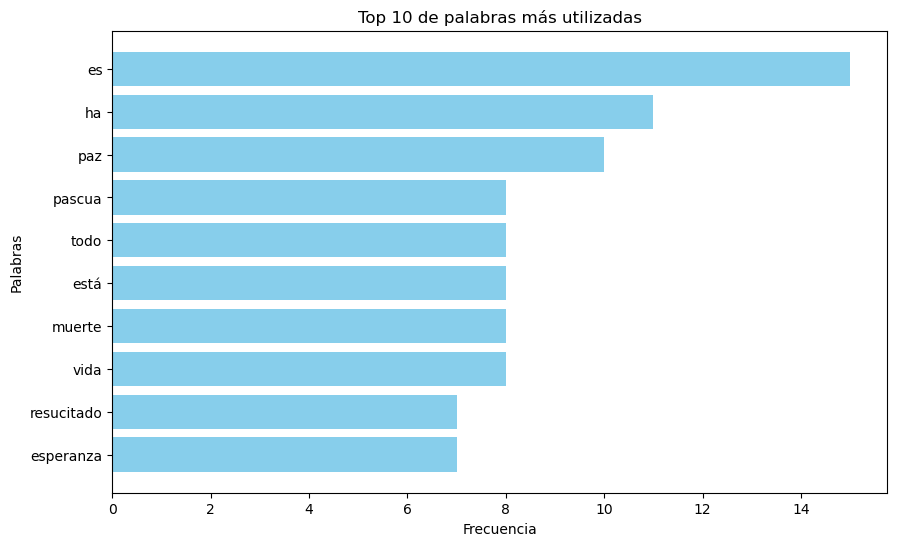

In [22]:
# Se realiza un top 10 de las palabras más utilizadas para posteriormente realizar un gráfico de barras horizontal
top_10 = conteo.most_common(10)

# División de cada palabra y las veces que se repite
palabras_top = [item[0] for item in top_10]
frecuencias_top = [item[1] for item in top_10]

# Creación gráfico
plt.figure(figsize=(10, 6))
plt.barh(palabras_top, frecuencias_top, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 10 de palabras más utilizadas')
plt.gca().invert_yaxis()
plt.show()

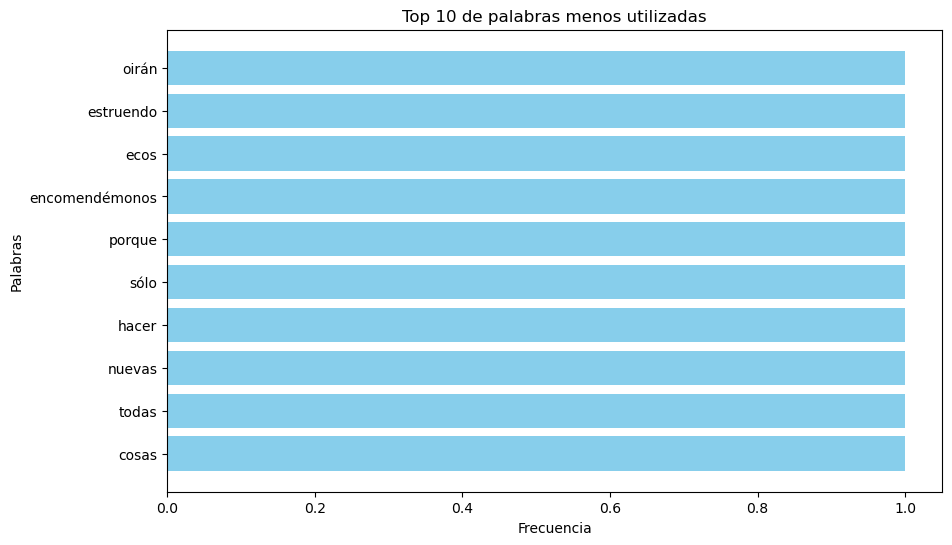

In [36]:
# NOTA --> Hay numerosas palabras que únicamente aparecen una vez, por lo que puede ser que cada vez que se ejecute un nuevo kernel y ejecutemos esta celda de código aparezcan otras palabras.

top_10 = conteo.most_common()[:-11:-1]

palabras_top = [item[0] for item in top_10]
frecuencias_top = [item[1] for item in top_10]

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.barh(palabras_top, frecuencias_top, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 10 de palabras menos utilizadas')
plt.show()
